In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Summary

In this notebook we follow the logic for our analysis that defines an effective nuclear-recoil Fano factor for germanium. We use the other notebooks in this directory as supporting references and present the line of logic for our publication [REF]. 

It is planned that all of the plots that go into the publication will be produced here from the data we have placed in the `data/` directory below this one. It is planned that all the data is referenced and where it came from is clear. 

The basic idea of this analysis is that there are measurements in the literature that constrain the width (second moment) of the ionization distribution for various materials. This has also been predicted by Lindhard [REF]. This variance in the number of charges produced by a nuclear recoil of a given energy far exceeds what is measured from electron recoils. In the electron recoils this is parameterized by the Fano factor and so here we define the "effective" Fano factor for nuclear recoils. 

While the width of the ionization distribution has not been important in the past because of excellent discrimination between electron- and nuclear-recoil events above about 10 keV, it is becoming more important for dark matter searches interested in lower recoil energies [REF] (SuperCDMS low threshold) and discriminationless [REF] (CDMSlite & HVeV) searches. 

# 1. Lindhard has Predicted this Variance and Dougherty has Measured it for Silicon

Dougherty has measured this effect in silicon and shown that it is near the predicted values from Lindhard [[Dough92][Dough92]]. See the notebook `silicon_Fano.ipynb` for the details of how an effective Fano factor is extracted from this silicon measurement. 

[Dough92]: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.45.2104 "Dougherty paper 1992"

The following table is a summary of those data along with the effective Fano estimate and uncertainty for each recoil energy data point measured in that publication.

Experimental uncertainties are quoted as values following the "$\pm$" symbol. The Observed width and Expected width are both in FWHM execpt for the 25.3 keV recoil energy point, which is quoted in half width at half max (HWHM). The excess fluctuation are given in 1$\sigma$. 

Si recoil energy (keV)|Observed ionization (keV)|Lindhard shift (keV)|Ionization efficiency (%)|Observed width (keV)|Expected width (keV)|Excess fluct. (%)| effective Fano
:-|:-|:-|:-|:-|:-|:-|:-
109.1$\pm$0.7|55.5$\pm$2|0.55|51.4$\pm$2|16$\pm$3|3.5$\pm$0.4|6.1$\pm$1.2|208$\pm$8
75.7 $\pm$0.4|33.3$\pm$0.4|0.31+0.94|45.6$\pm$0.5|9.6$\pm$1.0|1.1$\pm$0.3|5.3$\pm$0.6|123$\pm$2
25.3$\pm$0.3|8.90$\pm$0.1|0.074|35.5$\pm$0.6|1.30$\pm$0.04|0.75$\pm$0.1|3.6$\pm$0.3|24.3$\pm$0.2
7.50$\pm$0.03|2.01$\pm$0.02|0.012|26.9$\pm$0.4|0.55$\pm$0.07|0.24$\pm$0.01|2.8$\pm$0.4|5.75$\pm$0.12
4.15$\pm$0.15|0.93$\pm$0.02|0.008|22.5$\pm$0.5|0.32$\pm$0.06|0.236$\pm$0.005|2.2$\pm$0.9|2.35$\pm$0.39

In [2]:
import dataPython as dp
import numpy as np

lind_data0 = dp.getXYdata('data/lindhard2_OmegaepsD_fmt.txt')
lind_data1 = dp.getXYdata('data/lindhard2_OmegaepsE_fmt.txt')

lindD_e = np.asarray(lind_data0['xx'])
lindD = np.asarray(lind_data0['yy'])
lindE_e = np.asarray(lind_data1['xx'])
lindE = np.asarray(lind_data1['yy'])

In [3]:
Esi = np.vectorize(lambda x: np.sqrt(2)*2*x/(6.87758e-5*1000))

In [5]:
#create a yield model
import lindhard as lind

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
#ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


In [6]:
#convert the vectors
epsg = 3.8e-3 #keV average energy per electron-hole pair created


F_D = Esi(lindD_e)*(1/(epsg*ylindv(1000*Esi(lindD_e))))*lindD
F_E = Esi(lindE_e)*(1/(epsg*ylindv(1000*Esi(lindE_e))))*lindE

In [7]:
#get Dougherty Data
ddataY = dp.getXYdata_wXYerr('data/Dougherty_Yield.txt')
ddataFluct = dp.getXYdata_wXYerr('data/Dougherty_Fluct.txt')

#convert to numpy arrays
ddata_e = np.asarray(ddataFluct['xx'])
ddata_fluct = np.asarray(ddataFluct['yy'])
ddata_fluct_err = np.asarray(ddataFluct['ey'])

ddata_Y = np.asarray(ddataY['yy'])

epsg = 3.8e-3 #epsilon-gamma for silicon in keV per pair
ddata_fluct_F = (ddata_fluct/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
ddata_fluct_F_err = (ddata_fluct_err/100)**2 * (ddata_e/(epsg*(ddata_Y/100)))
                                        
print(ddata_fluct_F)
print(ddata_fluct_F_err)

[207.84410199 122.71543167  24.30600445   5.75229896   2.34923977]
[8.04341593 1.57271468 0.1687917  0.11739386 0.39315789]


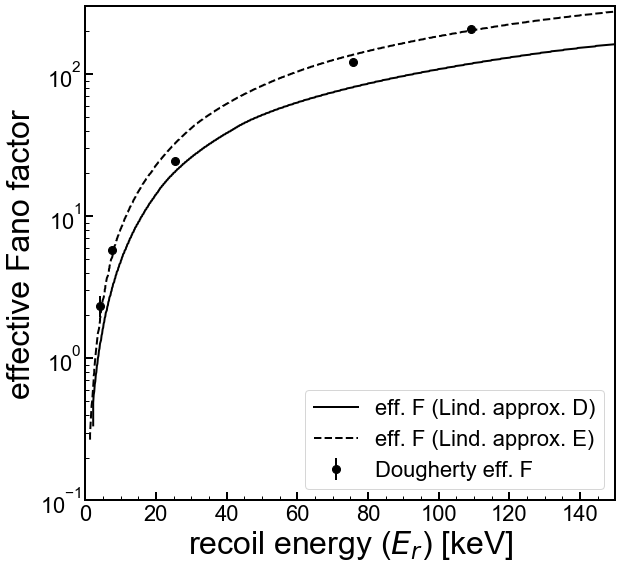

In [8]:
#set up a plot

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

xmax=10

ax1.errorbar(ddata_e,ddata_fluct_F,yerr=[ddata_fluct_F_err,ddata_fluct_F_err], marker='o', markersize=8, \
             ecolor='k',color='k', linestyle='none', label='Dougherty eff. F', linewidth=2)


#ax1.plot (X, diff, 'm-', label='Thomas-Fermi (newgrad)')
#ax1.plot (Esi(epr), 100*np.sqrt(f_Omega2_eta2(epr))*ylindv(1000*Esi(epr)), 'g-', label='$\Omega/\epsilon$ (NAC III approx. D)')
ax1.plot (Esi(lindD_e), F_D, 'k-', label='eff. F (Lind. approx. D)')
ax1.plot (Esi(lindE_e), F_E, 'k--', label='eff. F (Lind. approx. E)')




ax1.set_yscale('log')
ax1.set_xscale('linear')
ax1.set_xlim(Esi(0), 150)
ax1.set_ylim(0.1,300)
ax1.set_xlabel('recoil energy ($E_r$) [keV]',**axis_font)
ax1.set_ylabel('effective Fano factor',**axis_font)
#ax1.grid(True)
#ax1.xaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()